#### Import Needed Packages

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import joblib

#### Load Data

In [8]:
df = pd.read_csv('./retail_store_inventory.csv')
df.drop(['Store ID', 'Product ID','Date'], axis=1, inplace=True)

In [9]:
df.head(10)

,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer
5,Groceries,South,138,128,102,139.82,76.83,10,Sunny,1,79.35,Winter
6,Furniture,East,359,97,167,108.92,34.16,10,Rainy,1,36.55,Winter
7,Clothing,North,380,312,54,329.73,97.99,5,Cloudy,0,100.09,Spring
8,Electronics,West,183,175,135,174.15,20.74,10,Cloudy,0,17.66,Autumn
9,Toys,South,108,28,196,24.47,59.99,0,Rainy,1,61.21,Winter


## Encode all categorical values

In [10]:
# List of categorical columns
categorical_cols = ['Category', 'Region',
                    'Weather Condition', 'Seasonality']
# One-hot encode the categorical variables
df = pd.get_dummies(df, columns=categorical_cols)

In [11]:
df.head(10)

,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Holiday/Promotion,Competitor Pricing,Category_Clothing,Category_Electronics,...,Region_South,Region_West,Weather Condition_Cloudy,Weather Condition_Rainy,Weather Condition_Snowy,Weather Condition_Sunny,Seasonality_Autumn,Seasonality_Spring,Seasonality_Summer,Seasonality_Winter
0,231,127,55,135.47,33.50,20,0,29.69,False,False,...,False,False,False,True,False,False,True,False,False,False
1,204,150,66,144.04,63.01,20,0,66.16,False,False,...,True,False,False,False,False,True,True,False,False,False
2,102,65,51,74.02,27.99,10,1,31.32,False,False,...,False,True,False,False,False,True,False,False,True,False
3,469,61,164,62.18,32.72,10,1,34.74,False,False,...,False,False,True,False,False,False,True,False,False,False
4,166,14,135,9.26,73.64,0,0,68.95,False,True,...,False,False,False,False,False,True,False,False,True,False
5,138,128,102,139.82,76.83,10,1,79.35,False,False,...,True,False,False,False,False,True,False,False,False,True
6,359,97,167,108.92,34.16,10,1,36.55,False,False,...,False,False,False,True,False,False,False,False,False,True
7,380,312,54,329.73,97.99,5,0,100.09,True,False,...,False,False,True,False,False,False,False,True,False,False
8,183,175,135,174.15,20.74,10,0,17.66,False,True,...,False,True,True,False,False,False,True,False,False,False
9,108,28,196,24.47,59.99,0,1,61.21,False,False,...,True,False,False,True,False,False,False,False,False,True


#### Data Visualizations

Dataset Shape: (73100, 13)


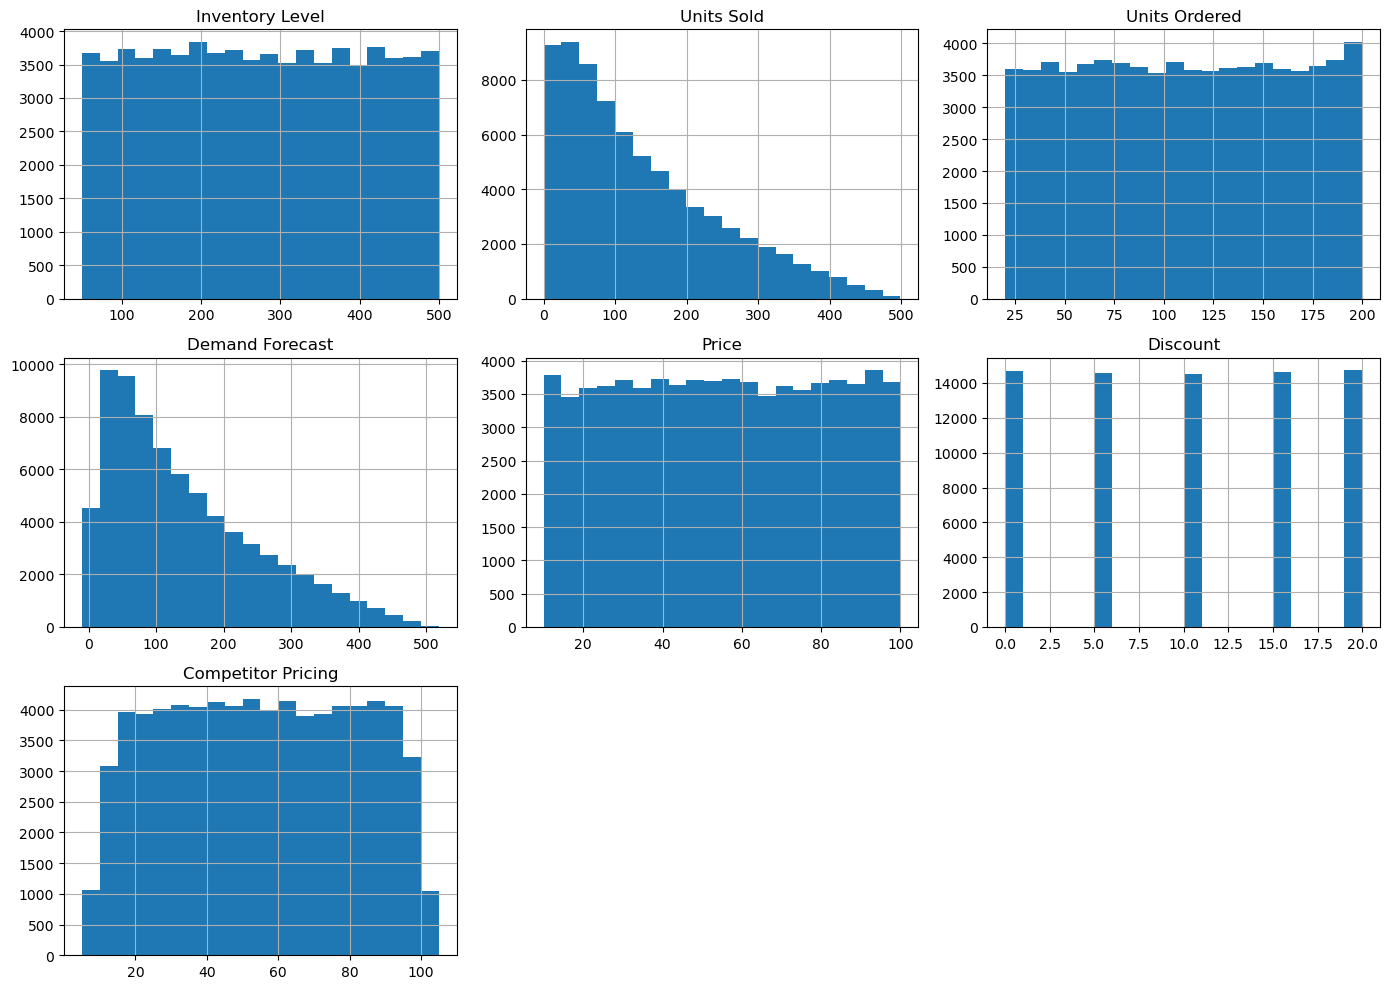

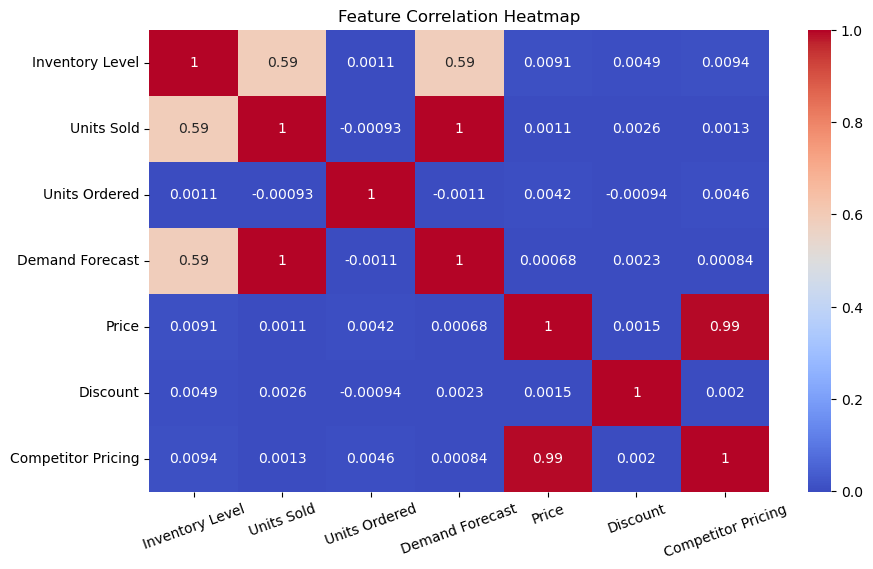

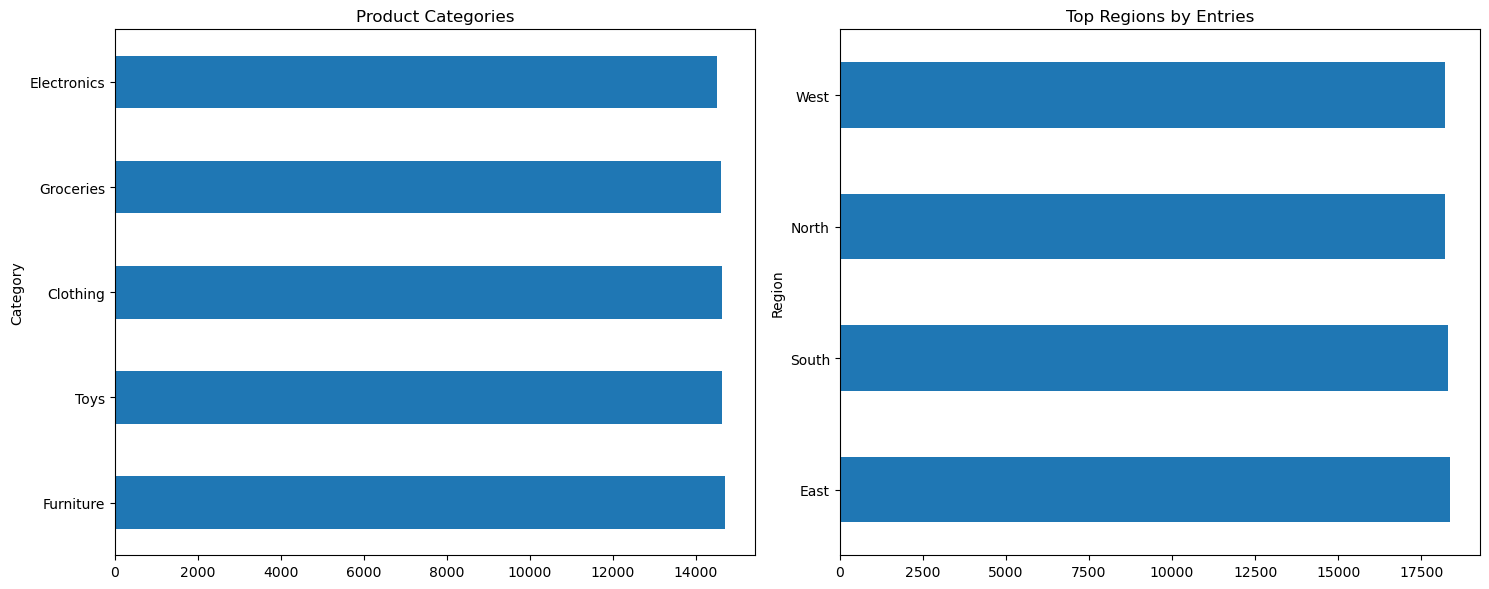

In [12]:
# Load the dataset
df = pd.read_csv('./retail_store_inventory.csv')

# Clean column names: remove leading/trailing spaces
df.columns = df.columns.str.strip()

# Drop unnecessary columns
df.drop(['Store ID', 'Product ID'], axis=1, inplace=True)

# Print dataset shape
print(f"Dataset Shape: {df.shape}")

# ---------- Numerical Features Analysis ----------
# Identify numerical columns from your dataset
num_features = ['Inventory Level', 'Units Sold', 'Units Ordered',
                'Demand Forecast', 'Price', 'Discount', 'Competitor Pricing']

# Plot histograms for numerical features
df[num_features].hist(figsize=(14, 10), bins=20)
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_features].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.xticks(rotation=20)
plt.show()

# ---------- Categorical Features Analysis ----------
plt.figure(figsize=(15, 6))

# Check and plot 'Category' column
if 'Category' in df.columns:
    plt.subplot(1, 2, 1)
    df['Category'].value_counts().plot(kind='barh', title='Product Categories')
else:
    print("'Category' column not found.")

# Check and plot 'Region' column
if 'Region' in df.columns:
    plt.subplot(1, 2, 2)
    df['Region'].value_counts().plot(kind='barh', title='Top Regions by Entries')
else:
    print("'Region' column not found.")

plt.tight_layout()
plt.show()



#### Preprocessing

In [13]:
# Strip any spaces from column names
df.columns = df.columns.str.strip()

# Define features
num_features = ['Inventory Level', 'Units Sold', 'Units Ordered',
                'Demand Forecast', 'Discount', 'Competitor Pricing']

cat_features = ['Category', 'Region', 'Weather Condition', 'Seasonality']

# Check if 'Price' exists
if 'Price' not in df.columns:
    raise ValueError("'Price' column not found in DataFrame. Available columns are: " + str(df.columns.tolist()))

# Define X and y
X = df.drop('Price', axis=1)
y = df['Price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Column transformations
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
])

# Fit and transform
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)


#### Training

In [14]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Decision Tree': DecisionTreeRegressor()
}

results = {}
for name, model in models.items():
    model.fit(X_train_processed, y_train)
    y_pred = model.predict(X_test_processed)
    train_pred = model.predict(X_train_processed)

    results[name] = {
        'Train MAE': mean_absolute_error(y_train, train_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'Train MSE': mean_squared_error(y_train, train_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'Train R2': r2_score(y_train, train_pred),
        'R2': r2_score(y_test, y_pred)
    }


Model Performance:
                       Train MAE       MAE     Train MSE        MSE  Train R2  \
Linear Regression  2.477715e+00  2.503050  8.212195e+00   8.325330  0.987848   
Random Forest      9.070035e-01  2.460498  1.158815e+00   8.350706  0.998285   
Decision Tree      1.822528e-19  3.238440  6.474919e-34  16.033561  1.000000   

                         R2  
Linear Regression  0.987798  
Random Forest      0.987761  
Decision Tree      0.976500  


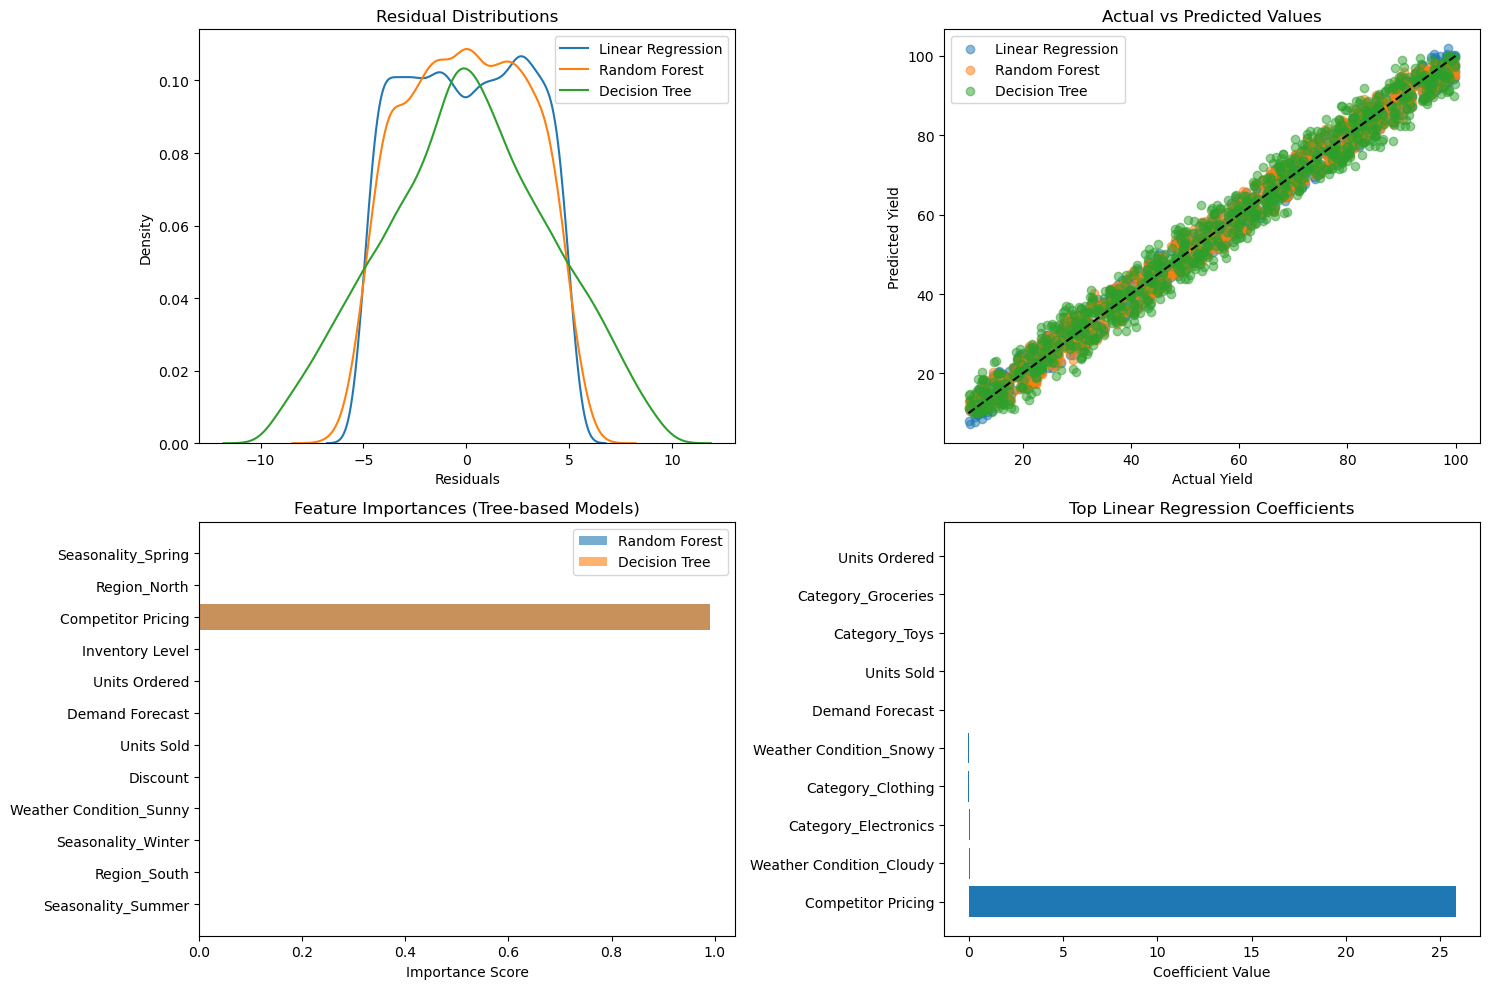

In [15]:
# Print metrics
metrics_df = pd.DataFrame(results).T
print("\nModel Performance:\n", metrics_df)

plt.figure(figsize=(15, 10))

# 1. Residual Analysis Plot
plt.subplot(2, 2, 1)
for idx, (name, model) in enumerate(models.items()):
    residuals = y_test - model.predict(X_test_processed)
    sns.kdeplot(residuals, label=name)
plt.title('Residual Distributions')
plt.xlabel('Residuals')
plt.legend()

# 2. Actual vs Predicted Plot
plt.subplot(2, 2, 2)
sample_idx = np.random.choice(len(y_test), 1000, replace=False)
for name, model in models.items():
    plt.scatter(y_test.iloc[sample_idx], model.predict(X_test_processed[sample_idx]),
                alpha=0.5, label=name)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.legend()

# 3. Feature Importance (for tree-based models)
plt.subplot(2, 2, 3)
feature_names = num_features + list(preprocessor.named_transformers_['cat'].get_feature_names_out(cat_features))

for idx, (name, model) in enumerate(models.items()):
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        top_idx = np.argsort(importances)[-10:]  # Top 10 features
        plt.barh(np.array(feature_names)[top_idx], importances[top_idx],
                 label=name, alpha=0.6)
plt.title('Feature Importances (Tree-based Models)')
plt.xlabel('Importance Score')
plt.legend()

# 4. Coefficient Plot for Linear Regression
plt.subplot(2, 2, 4)
lr_model = models["Linear Regression"]
coefs = pd.DataFrame({
    'feature': feature_names,
    'coef': lr_model.coef_,
    'abs_coef': np.abs(lr_model.coef_)
})
coefs = coefs.sort_values('abs_coef', ascending=False).head(10)

plt.barh(coefs['feature'], coefs['coef'])
plt.title('Top Linear Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.tight_layout()
plt.show()


#### Best Model Selection & Saving

In [16]:
best_model_name = min(results, key=lambda x: results[x]['MSE'])
best_model = models[best_model_name]
print(f"\nBest Model Identified: {best_model_name}")

# Save best model and preprocessor
joblib.dump(best_model, 'best_model.joblib', compress=4)
joblib.dump(preprocessor, 'preprocessor.joblib')
print("Best model and preprocessor saved successfully!")


Best Model Identified: Linear Regression
Best model and preprocessor saved successfully!


#### Linear Regression Scatter Plot

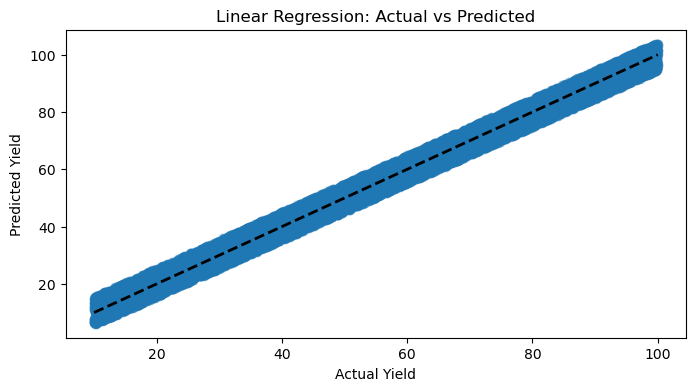

In [17]:
plt.figure(figsize=(8, 4))
plt.scatter(y_test, models['Linear Regression'].predict(X_test_processed), alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()

#### Sample Prediction

In [18]:
def predict_yield(input_data):
    processed_data = preprocessor.transform(pd.DataFrame([input_data]))
    return best_model.predict(processed_data)[0]

In [19]:
X_test.iloc[80]

Date                  2023-05-21
Category                Clothing
Region                      West
Inventory Level              250
Units Sold                   100
Units Ordered                 46
Demand Forecast           106.66
Discount                      10
Weather Condition          Snowy
Holiday/Promotion              1
Competitor Pricing         26.32
Seasonality               Summer
Name: 50532, dtype: object

In [20]:
sample_input = X_test.iloc[80]

print(f"\nPredicted price: {predict_yield(sample_input):.2f} $")


Predicted price: 26.64 $
